In [4]:
import os

# The images are in a folder named 'shapes/training'
train_dir_name = '../../../data/classification/valence/train'

# All images are 128x128 pixels
img_size = (32,32)

# The folder contains a subfolder for each class of shape
classes = sorted(os.listdir(train_dir_name))

In [5]:
import sys
import keras
print('Keras version:',keras.__version__)

from keras import backend as K

Using TensorFlow backend.


Keras version: 2.3.1


In [6]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 32

datagen = ImageDataGenerator(rescale=1./255, # normalize pixel values
                             validation_split=0.2) # hold back 30% of the images for validation

train_generator = datagen.flow_from_directory(
    train_dir_name,
    target_size=img_size,
    color_mode='rgba',
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = datagen.flow_from_directory(
    train_dir_name,
    target_size=img_size,
    color_mode='rgba',
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 12300 images belonging to 2 classes.
Found 3073 images belonging to 2 classes.


In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras import optimizers

model = Sequential()

model.add(Conv2D(32, (3, 3), strides=1, padding='same', input_shape=train_generator.image_shape, activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Conv2D(64, (3, 3), strides=1, padding='same', input_shape=train_generator.image_shape, activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Conv2D(128, (3, 3), strides=1, padding='same', input_shape=train_generator.image_shape, activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Flatten())

model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))

model.add(Dense(train_generator.num_classes, activation='softmax'))

opt = optimizers.Adam(lr=0.001)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        1184      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)             

In [8]:
num_epochs = 200
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = num_epochs)

Epoch 1/200
384/384 [==============================] - 10s 25ms/step - loss: 0.6937 - accuracy: 0.5178 - val_loss: 0.6832 - val_accuracy: 0.5254
Epoch 2/200
384/384 [==============================] - 9s 24ms/step - loss: 0.6923 - accuracy: 0.5257 - val_loss: 0.6807 - val_accuracy: 0.5271
Epoch 3/200
384/384 [==============================] - 9s 24ms/step - loss: 0.6921 - accuracy: 0.5272 - val_loss: 0.7025 - val_accuracy: 0.5248
Epoch 4/200
384/384 [==============================] - 10s 25ms/step - loss: 0.6909 - accuracy: 0.5336 - val_loss: 0.7052 - val_accuracy: 0.5245
Epoch 5/200
384/384 [==============================] - 11s 28ms/step - loss: 0.6895 - accuracy: 0.5391 - val_loss: 0.6879 - val_accuracy: 0.5271
Epoch 6/200
384/384 [==============================] - 10s 26ms/step - loss: 0.6867 - accuracy: 0.5396 - val_loss: 0.6864 - val_accuracy: 0.5284
Epoch 7/200
384/384 [==============================] - 11s 28ms/step - loss: 0.6854 - accuracy: 0.5448 - val_loss: 0.6781 - val_accu

384/384 [==============================] - 12s 31ms/step - loss: 0.3296 - accuracy: 0.8291 - val_loss: 2.3212 - val_accuracy: 0.5071
Epoch 58/200
384/384 [==============================] - 14s 35ms/step - loss: 0.3206 - accuracy: 0.8321 - val_loss: 1.9590 - val_accuracy: 0.5186
Epoch 59/200
384/384 [==============================] - 12s 31ms/step - loss: 0.3205 - accuracy: 0.8354 - val_loss: 1.8922 - val_accuracy: 0.5209
Epoch 60/200
384/384 [==============================] - 11s 28ms/step - loss: 0.3198 - accuracy: 0.8419 - val_loss: 0.9178 - val_accuracy: 0.5005
Epoch 61/200
384/384 [==============================] - 13s 35ms/step - loss: 0.3081 - accuracy: 0.8410 - val_loss: 2.9695 - val_accuracy: 0.5206
Epoch 62/200
384/384 [==============================] - 13s 34ms/step - loss: 0.3169 - accuracy: 0.8377 - val_loss: 1.0888 - val_accuracy: 0.5212
Epoch 63/200
384/384 [==============================] - 13s 33ms/step - loss: 0.3040 - accuracy: 0.8433 - val_loss: 1.5157 - val_accuracy

384/384 [==============================] - 13s 34ms/step - loss: 0.2060 - accuracy: 0.8973 - val_loss: 3.8479 - val_accuracy: 0.5074
Epoch 114/200
384/384 [==============================] - 14s 36ms/step - loss: 0.2122 - accuracy: 0.8938 - val_loss: 2.2512 - val_accuracy: 0.5169
Epoch 115/200
384/384 [==============================] - 12s 32ms/step - loss: 0.2172 - accuracy: 0.8884 - val_loss: 2.6731 - val_accuracy: 0.5087
Epoch 116/200
384/384 [==============================] - 14s 35ms/step - loss: 0.2045 - accuracy: 0.8980 - val_loss: 4.5946 - val_accuracy: 0.4988
Epoch 117/200
384/384 [==============================] - 12s 32ms/step - loss: 0.2079 - accuracy: 0.8939 - val_loss: 1.6776 - val_accuracy: 0.5209
Epoch 118/200
384/384 [==============================] - 14s 35ms/step - loss: 0.2034 - accuracy: 0.8959 - val_loss: 2.3433 - val_accuracy: 0.5090
Epoch 119/200
384/384 [==============================] - 14s 36ms/step - loss: 0.2121 - accuracy: 0.8928 - val_loss: 1.6039 - val_ac

Epoch 169/200
384/384 [==============================] - 12s 30ms/step - loss: 0.1739 - accuracy: 0.9119 - val_loss: 2.3271 - val_accuracy: 0.5120
Epoch 170/200
384/384 [==============================] - 13s 34ms/step - loss: 0.1643 - accuracy: 0.9209 - val_loss: 1.2787 - val_accuracy: 0.5186
Epoch 171/200
384/384 [==============================] - 12s 31ms/step - loss: 0.1695 - accuracy: 0.9144 - val_loss: 1.0066 - val_accuracy: 0.5159
Epoch 172/200
384/384 [==============================] - 13s 33ms/step - loss: 0.1668 - accuracy: 0.9175 - val_loss: 1.4846 - val_accuracy: 0.5215
Epoch 173/200
384/384 [==============================] - 12s 30ms/step - loss: 0.1563 - accuracy: 0.9204 - val_loss: 3.2310 - val_accuracy: 0.5173
Epoch 174/200
384/384 [==============================] - 12s 32ms/step - loss: 0.1593 - accuracy: 0.9190 - val_loss: 1.9913 - val_accuracy: 0.5212
Epoch 175/200
384/384 [==============================] - 13s 33ms/step - loss: 0.1667 - accuracy: 0.9148 - val_loss: 2

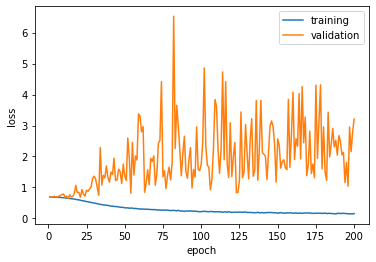

In [46]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()